In [2]:
def load_data():
    data_pth = 'allData/prognosis_mix_hb/pretreatment_response/merge_psychiatry_demo_dose_data.npy'
    label_pth = 'allData/prognosis_mix_hb/pretreatment_response/label_hamd.npy'
    data = np.load(data_pth)
    labels = np.load(label_pth)
    labels = change_hamd_to_percent(labels)
    return data, labels

data, label = load_data()
data.shape

(64, 10)

No handles with labels found to put in legend.


Current system is Ubuntu
[-0.24       -0.33333333 -0.25925926 -0.25        0.58823529  0.5
  0.13333333  0.38095238 -0.13636364 -0.19047619 -0.28571429 -0.23809524
  0.52631579 -0.06666667 -0.56521739 -0.38095238  0.         -0.44444444
 -0.4         0.26315789 -0.66666667 -0.36       -0.86363636 -0.33333333
 -0.43333333 -0.76       -0.5        -0.16666667 -0.42307692 -0.25
 -0.04347826  0.125      -0.25       -0.25       -0.08333333 -0.08
 -0.36363636 -0.04761905 -0.6875     -0.5483871  -0.03846154 -0.56521739
  0.          0.16666667 -0.13043478 -0.61904762  0.06666667 -0.71428571
 -0.56521739 -0.34615385  0.33333333  0.63157895 -0.375       0.6
 -0.125      -0.5        -0.53846154 -0.17647059  0.14285714  0.5
 -1.          0.         -0.25       -0.31578947]


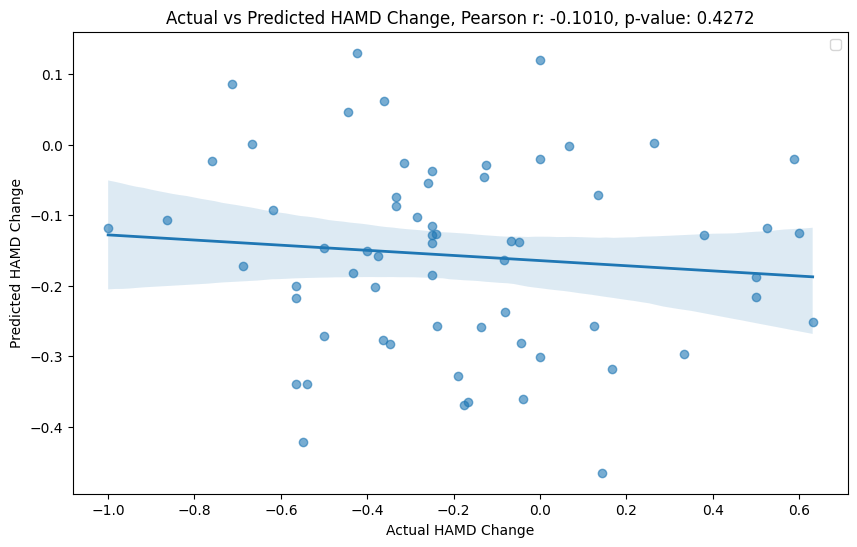

In [15]:
import numpy as np 
import os 
import sys 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

def set_path():
    if sys.platform == 'darwin':
        print("Current system is macOS")
        main_fold_path = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction'
    elif sys.platform == 'linux':
        print("Current system is Ubuntu")
        main_fold_path = '/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning'
    else:
        print("Current system is neither macOS nor Ubuntu")
    os.chdir(main_fold_path)

def change_hamd_to_percent(labels):
    res = labels[:, 1] - labels[:, 0]
    res = res / labels[:, 0]
    return res 

def load_data():
    data_pth = 'allData/prognosis_mix_hb/pretreatment_response/merge_psychiatry_demo_dose_data.npy'
    label_pth = 'allData/prognosis_mix_hb/pretreatment_response/label_hamd.npy'
    data = np.load(data_pth)
    labels = np.load(label_pth)
    labels = change_hamd_to_percent(labels)
    return data, labels

def load_gnntr():
    res_path = 'results/gnn_transformer_regression/prognosis_mix_hb/pretreatment_response/loocv_v0label_path_label_reduce_percentage.npy_l1_rate_0.01_l2_rate_0.001_d_model_16_batch_size_64_n_layers_6_epochs_350_num_class_1'

    y_pred_in_test_all = []

    for loo in range(64):
        sub_pred = []
        for k in range(5):
            val_pth = res_path + f'/LOO_nested_CV/LOO_{loo}/stratified_nested_5_CV_fold-{k}/val_acc.txt'
            with open(val_pth, 'r') as f:
                val_acc = f.read()
                y_pred_in_test = re.findall(r'Y_pred_in_test:\s*\[([-.\d]+)\]', val_acc)
                
                if y_pred_in_test:
                    y_pred_in_test_value = float(y_pred_in_test[0])
                    sub_pred.append(y_pred_in_test_value)
                else:
                    raise ValueError(f'Cannot find Y_pred_in_test in {val_pth}')
        sub_pred = np.mean(sub_pred)
        y_pred_in_test_all.append(sub_pred)
    return y_pred_in_test_all


if __name__ == "__main__":
    # Change the working directory to the main folder
    set_path()
    
    # Load the data
    data, labels = load_data()
    print(labels)
    
    
    preds = load_gnntr()
    
    # Perform regression and plot results
    plt.figure(figsize=(10, 6))
    sns.regplot(x=labels, y=preds, scatter_kws={'alpha':0.6}, line_kws={"linewidth":2})

    # Calculate Pearson correlation
    r, p_value = pearsonr(labels, preds)
    plt.title(f'Actual vs Predicted HAMD Change, Pearson r: {r:.4f}, p-value: {p_value:.4g}')
    plt.xlabel('Actual HAMD Change')
    plt.ylabel('Predicted HAMD Change')
    plt.legend()
    plt.show()


In [10]:
import re


                    

64
